# Solution for Exercise 7: Lennard-Jones Molecular Dynamics

----

We first have to import numpy and matplotlib:

In [1]:
import numpy as np
from matplotlib import pyplot as plt 

Next, we need to define the parameters of the simulation:

In [2]:
N = 10000   # Number of integration steps
m = 1.0    # mass of the particle
dt = 0.1   # integration time step

eps = 0.1  # coupling constant
r = 3.0    # radius

----
## Verlet algorithm

Define variables for Verlet positions $vx$ and velocities $vv$ as before:

In [3]:
vx= np.zeros(N)
vv= np.zeros(N)

Set initial conditions as before:

In [4]:
vx[0] = 3.5
vv[0] = -0.2

The first step is special and is calculated separately:

In [5]:
#F= -k * vx[0];
#vx[1] = vx[0] + dt * vv[0] + F / (2 * m) * dt**2

#F=  -12 * eps * (r**6/vx[0]**7) * (1-(r**6/vx[0]**6)) 
F=  -12 * eps * (r**6/vx[0]**7) * (1-(r**6/vx[0]**6)) 
vx[1] = vx[0] + dt * vv[0] + F / (2 * m) * dt**2
vv[1] = (vx[0]-vx[1]) / dt


All remaining timesteps can be calculated again in a *for*-loop:

In [6]:
for i in range(1,N-1):
    # force:
    #F= -k * vx[i]
    F= -12 * eps * (r**6/vx[i]**7) * (1-(r**6/vx[i]**6)) 

    # position:
    vx[i+1]= 2 * vx[i] - vx[i-1] + F/m * dt**2

    # velocity:
    vv[i]= (vx[i+1] - vx[i-1]) / ( 2 * dt )

----
## 4) Plot and compare the solutions

For this, we first need an array for the timepoints $t$ to plot against:

In [7]:
t = np.arange(N) * dt

Use matplotlib to plot all three curves in one axis:

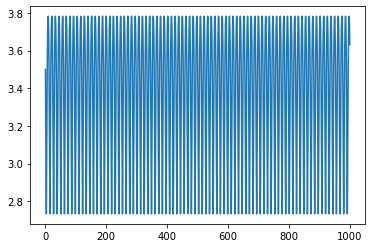

In [8]:
plt.plot(t, vx, '-')
plt.show()

In [9]:
Ekin= 0.5*m*(vv**2)
Epot= eps * ( (r/vx)**12 - 2 * (r/vx)**6)
print("Ekin=", np.average(Ekin))
print("Epot=", np.average(Epot))

Ekin= 0.02109224179821256
Epot= -0.06469713568315942


In [10]:
np.average(Ekin)/np.average(Epot)

-0.32601507895971416

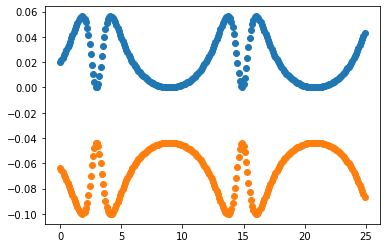

In [11]:
plt.plot(t[:250],Ekin[:250], 'o')
plt.plot(t[:250],Epot[:250], 'o')
plt.show()

In [12]:
np.min(Epot)

-0.09999999971755502

In [13]:
0.16/-0.77

-0.20779220779220778